## REquired Library

In [1]:
import pandas as pd
import joblib

## EDA

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
import joblib

encoder = joblib.load('churn_ohe.pkl')

In [4]:
encoder

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [5]:
categorical_cols = ['Geography', 'Card Type']

In [6]:
encoded_array = encoder.transform(df[categorical_cols])

In [7]:
encoder.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'], dtype=object)

In [8]:
encoder_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

In [9]:
df_final = pd.concat([df, encoder_df], axis=1)

In [10]:
df_final

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,2,DIAMOND,464,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,3,DIAMOND,456,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,3,DIAMOND,377,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,5,GOLD,350,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,5,GOLD,425,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,1,DIAMOND,300,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,5,PLATINUM,771,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,3,SILVER,564,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,2,GOLD,339,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df_final.drop(columns=categorical_cols, inplace=True)

In [12]:
df_final.iloc[10:15]

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
10,11,15767821,Bearce,528,Male,31,6,102016.72,2,0,...,0,3,264,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11,12,15737173,Andrews,497,Male,24,3,0.00,2,1,...,0,3,249,0.0,0.0,1.0,0.0,1.0,0.0,0.0
12,13,15632264,Kay,476,Female,34,10,0.00,2,1,...,0,3,119,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,14,15691483,Chin,549,Female,25,5,0.00,2,0,...,0,3,549,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14,15,15600882,Scott,635,Female,35,7,0.00,2,1,...,0,2,318,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## loading labelencoded .pkl file here

In [13]:
label_encoder = joblib.load('churn_labelencoder.pkl')

In [14]:
df_final['Gender'] = label_encoder.transform(df_final['Gender'])

In [15]:
df_final.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,...,1,2,464,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,...,1,3,456,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,...,1,3,377,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,...,0,5,350,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,...,0,5,425,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
df_final.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

In [17]:
df_final = df_final.drop(columns=['RowNumber', 'CustomerId',  'Surname' ])

## Required libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Geography_France    10000 non-null  float64
 14  Geography_Germany   10000 non-null  float64
 15  Geography_Spain     10000 non-null  float64
 16  Card 

In [20]:
df_final.duplicated().sum()

np.int64(0)

In [21]:
X = df_final.drop(['Exited'], axis=1)
y = df_final['Exited']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
decision_tree = DecisionTreeClassifier(max_depth=6)

In [24]:
df_final.corr(numeric_only=True)['Exited'].sort_values(ascending=False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Geography_Germany     0.173313
Balance               0.118577
Card Type_DIAMOND     0.020089
EstimatedSalary       0.012490
Card Type_PLATINUM   -0.000276
Card Type_SILVER     -0.003834
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
Card Type_GOLD       -0.015995
CreditScore          -0.026771
NumOfProducts        -0.047611
Geography_Spain      -0.052800
Geography_France     -0.104688
Gender               -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [25]:
decision_tree.fit(X_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
print('accuracy: ', decision_tree.score(X_train, y_train))

accuracy:  0.9994285714285714


In [27]:
print('accuracy: ', decision_tree.score(X_test, y_test))

accuracy:  0.998


In [28]:
y_pred = decision_tree.predict(X_test)

In [29]:
print(precision_score(y_test, y_pred))

0.9914965986394558


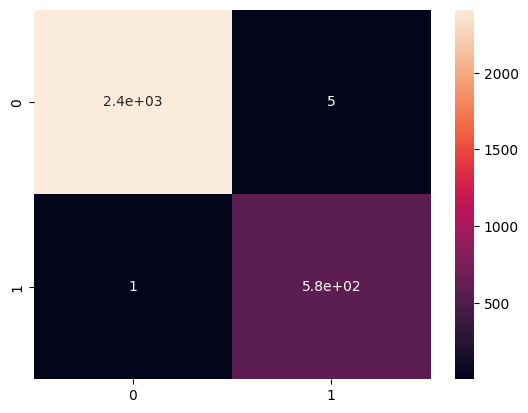

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [31]:
print(recall_score(y_test, y_pred))

0.9982876712328768


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      0.99       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [33]:
from sklearn.tree import export_graphviz

In [34]:
export_graphviz(decision_tree, out_file='tree.dot', class_names=['churn', 'not_churn'],
feature_names=X.columns, filled= True)

In [35]:
import graphviz

In [36]:
with open('tree.dot') as f:
    graph = f.read()

## getting important feature

In [38]:
import joblib

In [39]:
print('important_features: ', decision_tree.feature_importances_)

important_features:  [7.46112296e-04 1.40681106e-04 1.31889572e-04 1.42303274e-03
 2.89683581e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.22474319e-04 9.94086525e-01 3.75149617e-04 1.76741037e-03
 0.00000000e+00 0.00000000e+00 1.98915634e-05 0.00000000e+00
 0.00000000e+00 9.71500385e-05 0.00000000e+00]


In [40]:
import numpy as np

In [41]:
column = np.array(X.columns)

column

array(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'], dtype=object)

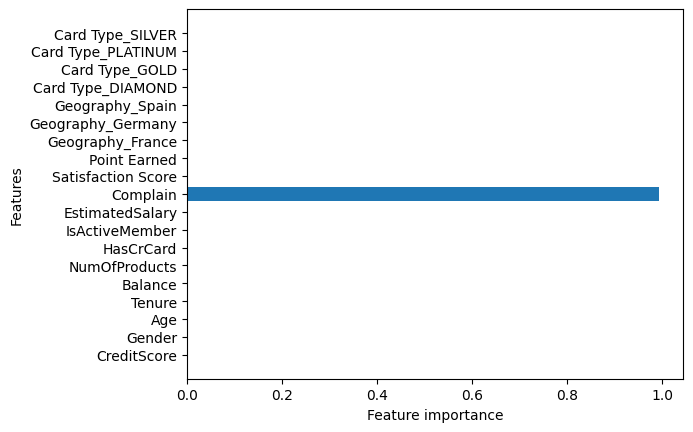

In [47]:
plt.barh(column, decision_tree.feature_importances_,align='center')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

In [46]:
joblib.dump(decision_tree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']